In [44]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [45]:
##loading data
df = pd.read_csv("datasets/Preprocessed_data.csv", encoding = "utf-8", index_col=False)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [46]:
##Observing the data
df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit,year-month,Profit margin,isReturned
0,1,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136,2016-11,0.16,True
1,2,CA-2016-152156,2016-11-08,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820,2016-11,0.30,True
2,3,CA-2016-138688,2016-06-12,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714,2016-06,0.47,True
3,4,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310,2015-10,-0.40,True
4,5,US-2015-108966,2015-10-11,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164,2015-10,0.11,True


In [47]:
##Total Profit during all the period
float(round(df["Profit"].sum(),2))

286397.02

In [48]:
##Preparing data
colors = ['skyblue', 'lightgreen', 'salmon', 'gold', 'purple']
top5_products = df.groupby(by = "Product Name")["Sales"].sum().sort_values(ascending=False)[:5]

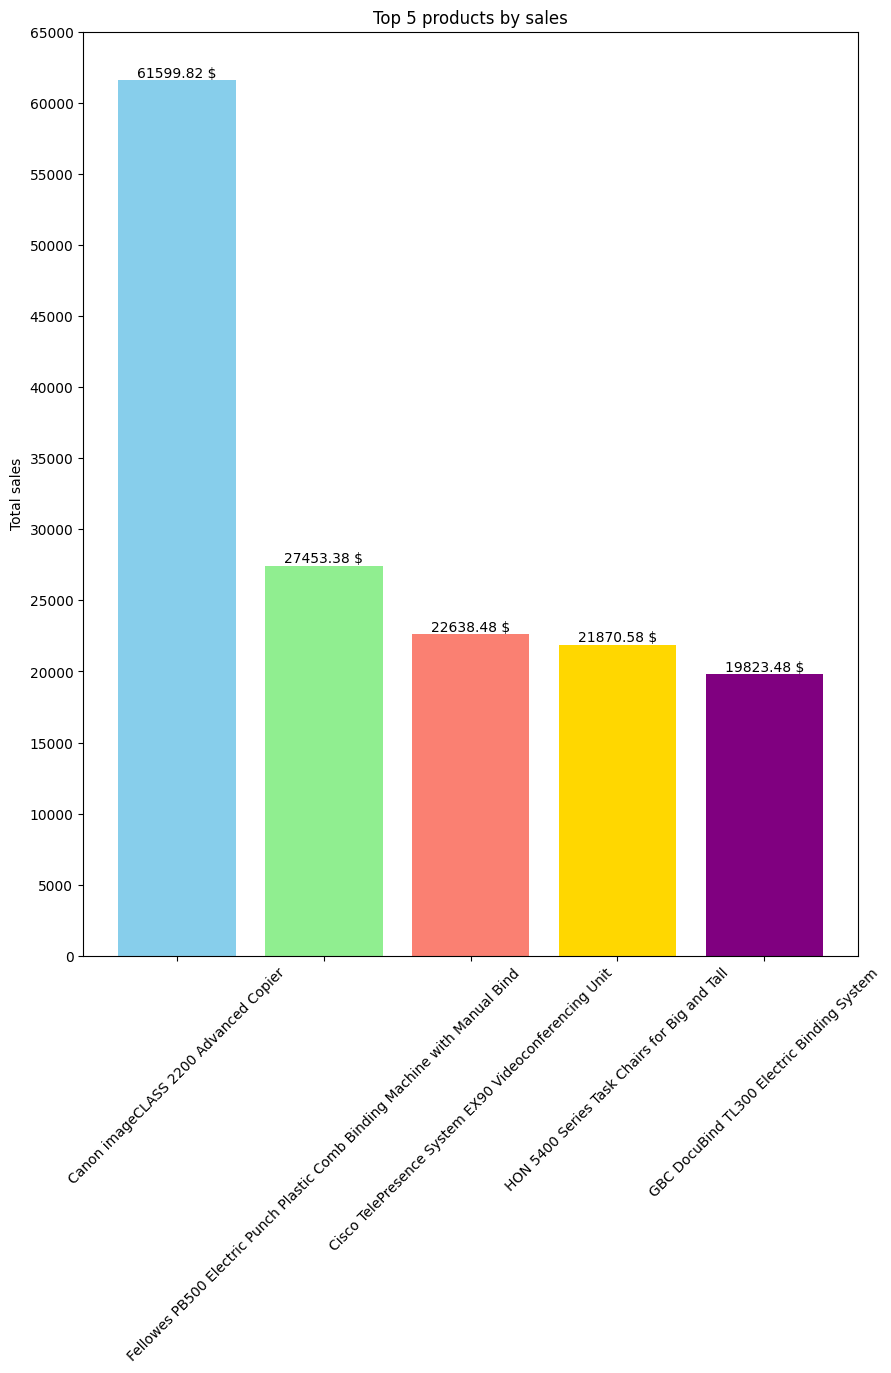

In [49]:
##Top 5 products by sales
fig, ax = plt.subplots(figsize=(10,12))
bar_container = ax.bar(top5_products.index, top5_products.values, color=colors)
ax.bar_label(bar_container, fmt=lambda x: f'{x :.2f} $')
ax.set(ylabel="Total sales", title="Top 5 products by sales", yticks=range(0, 65001, 5000))
plt.xticks(rotation=45)
plt.savefig("images/Top5_products_plot.png")
plt.show()

In [50]:
##Preparing data 
top5_clients = df.groupby(by="Customer Name")["Profit"].sum().sort_values(ascending=False)[:5]
colors = sns.color_palette("flare", n_colors=5)

In [51]:
##func for legend 
def func(pct, allvals):
    absolute = round(pct/100. * np.sum(allvals),2)
    return f"{pct:.1f}% \n{absolute}$"

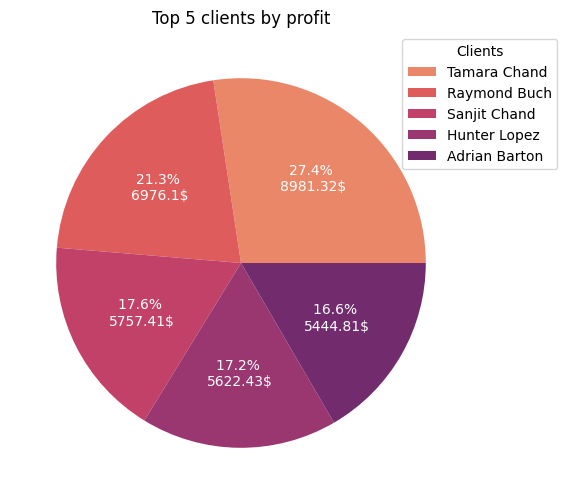

In [52]:
##Plot top 5 clients by profit
fig, ax = plt.subplots(figsize=(10,6), subplot_kw=dict(aspect = "equal"))
wedges, texts, autotexts = ax.pie(top5_clients.values, autopct= lambda pct: func(pct, np.sum(top5_clients.values)),
                                 textprops=dict(color="w"), colors=colors)
ax.legend(wedges, top5_clients.index, title = "Clients", loc="upper right", bbox_to_anchor=(1, 0, 0.2, 1))
ax.set_title("Top 5 clients by profit")
plt.savefig("images/Top5_clients.png")
plt.show()

In [53]:
##Average Bill for each order
average_order_value = round(df.groupby(by="Order ID")["Sales"].mean(),2).sort_values(ascending=False)
average_order_value

Order ID
CA-2017-166709    10499.97
CA-2016-117121     9892.74
CA-2014-145541     6999.96
CA-2017-140151     4684.16
CA-2014-144624     4548.81
                    ...   
US-2017-100209        1.08
US-2014-152723        0.88
CA-2014-112403        0.85
CA-2016-168361        0.84
CA-2017-124114        0.56
Name: Sales, Length: 5009, dtype: float64

In [54]:
##Orders each month
sales_by_month = df.groupby(by="year-month")["Sales"].count()
sales_by_month

year-month
2014-01     79
2014-02     46
2014-03    157
2014-04    135
2014-05    122
2014-06    135
2014-07    143
2014-08    153
2014-09    268
2014-10    159
2014-11    318
2014-12    278
2015-01     58
2015-02     64
2015-03    138
2015-04    160
2015-05    146
2015-06    138
2015-07    140
2015-08    159
2015-09    293
2015-10    166
2015-11    324
2015-12    316
2016-01     89
2016-02     83
2016-03    163
2016-04    170
2016-05    225
2016-06    199
2016-07    201
2016-08    176
2016-09    363
2016-10    196
2016-11    370
2016-12    352
2017-01    155
2017-02    107
2017-03    238
2017-04    203
2017-05    242
2017-06    245
2017-07    226
2017-08    218
2017-09    459
2017-10    298
2017-11    459
2017-12    462
Name: Sales, dtype: int64

In [55]:
##Prepared data
s = sales_by_month.values
s_mean = np.mean(s)
dates = sales_by_month.index

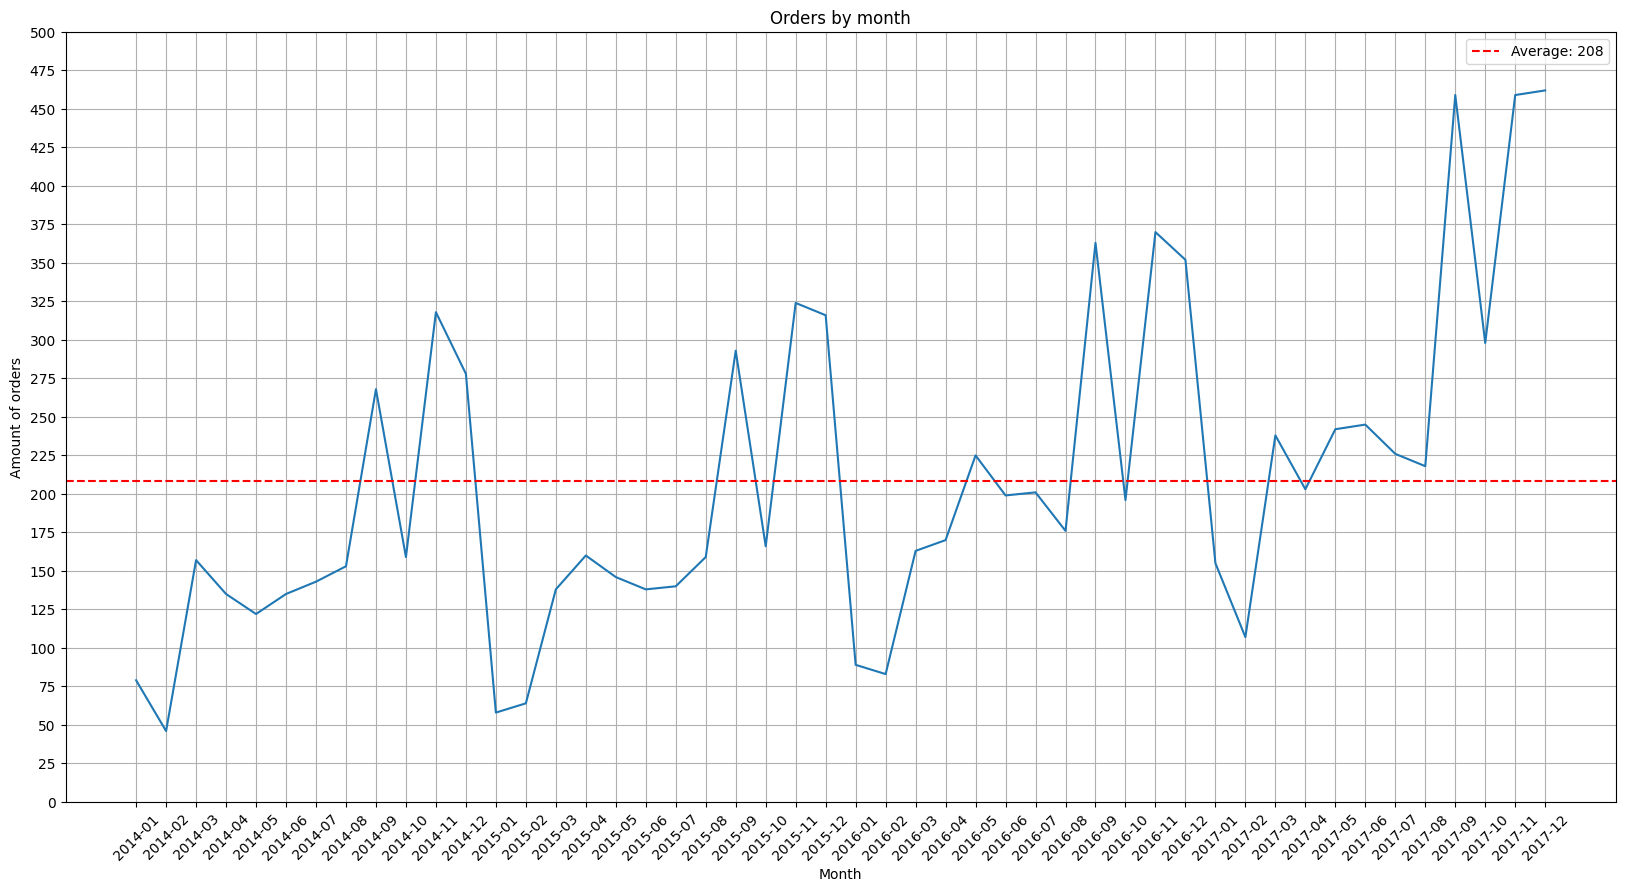

In [56]:
##Line plot Orders by month 
fig, ax = plt.subplots(figsize=(20,10))
ax.plot(dates, s)
ax.set(xlabel="Month", ylabel="Amount of orders", title= "Orders by month", yticks= range(0, 501, 25))
ax.grid()
ax.axhline(s_mean, color='red', linestyle='--', label=f'Average: {s_mean:.0f}')
plt.xticks(rotation=45)
plt.legend()
plt.savefig("images/Season_plot.png")
plt.show()

November and December are stable months with most orders each year

In [57]:
##Preparing data
profit_by_regions = df.groupby(by="Region")["Profit"].sum().sort_values(ascending = False)
colors = sns.color_palette("icefire", n_colors=4)
profit_by_regions

Region
West       108418.4489
East        91522.7800
South       46749.4303
Central     39706.3625
Name: Profit, dtype: float64

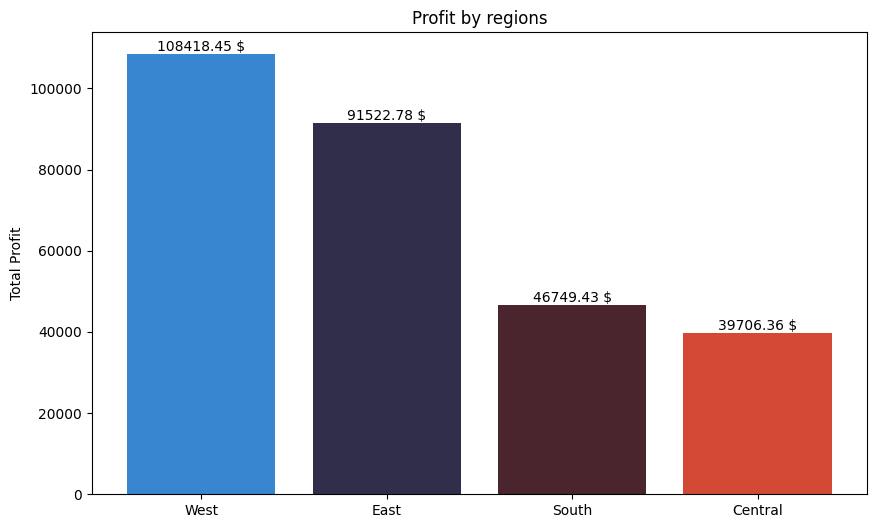

In [58]:
##Profit by regions plot
fig, ax = plt.subplots(figsize = (10,6))
bar_container = ax.bar(profit_by_regions.index, profit_by_regions.values, color = colors)
ax.bar_label(bar_container, fmt=lambda x: f'{x :.2f} $')
ax.set(ylabel="Total Profit", title="Profit by regions")
plt.savefig("images/Profit_by_regions.png")
plt.show()

In [59]:
##boxplot data
profit_by_category = df.groupby(by="Category")["Profit"].sum()
labels = df["Category"].unique()
y = [df[df["Category"] == x ]["Profit"] for x in labels]
colors = sns.diverging_palette(145, 300, s=60, n=3)
y

[0        41.9136
 1       219.5820
 3      -383.0310
 5        14.1694
 10       85.3092
           ...   
 9962    -67.6704
 9964      6.4320
 9980     22.3548
 9989      4.1028
 9990     15.6332
 Name: Profit, Length: 2121, dtype: float64,
 2        6.8714
 4        2.5164
 6        1.9656
 8        5.7825
 9       34.4700
          ...   
 9982    16.7132
 9984    15.1200
 9985    16.1240
 9992    13.3200
 9993    72.9480
 Name: Profit, Length: 6026, dtype: float64,
 7        90.7152
 11       68.3568
 19       16.0110
 26       11.7741
 35      123.4737
           ...   
 9983     27.4344
 9986     15.2208
 9987     28.7964
 9988     55.6470
 9991     19.3932
 Name: Profit, Length: 1847, dtype: float64]

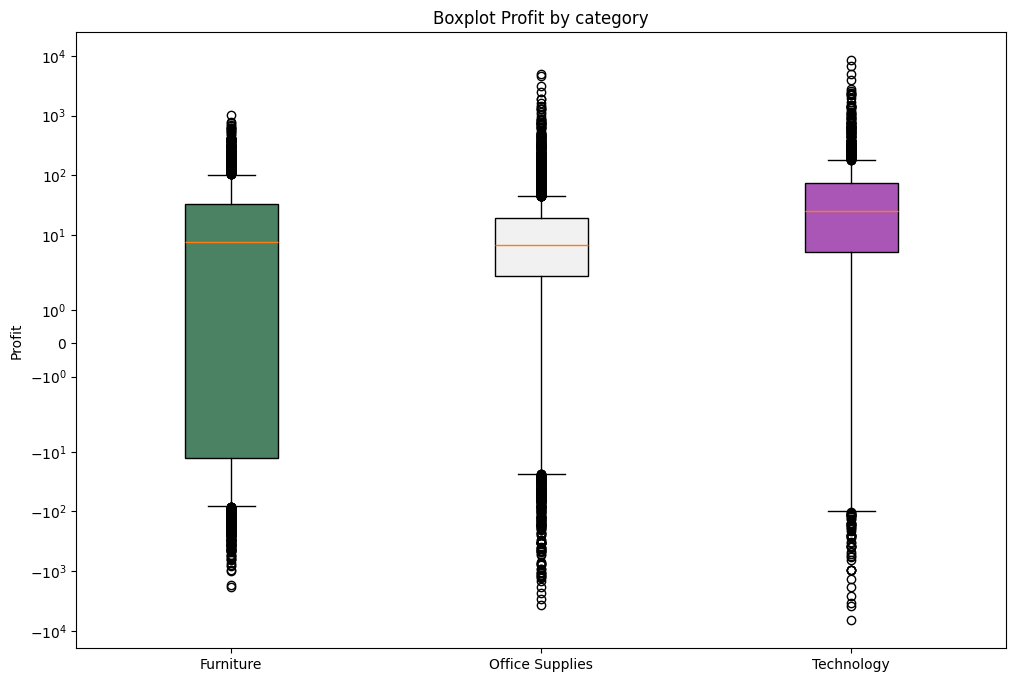

In [60]:
##Boxplot profit by category
fig, ax = plt.subplots(figsize=(12,8))
ax.set_ylabel('Profit')

bplot = ax.boxplot(y,
                   patch_artist=True, 
                   tick_labels=labels)
ax.set_yscale('symlog')
for patch, color in zip(bplot['boxes'], colors):
    patch.set_facecolor(color)
ax.set_title("Boxplot Profit by category")
plt.savefig("images/Profit_by_category_boxplot.png")

Furniture has the most negative profit from all the categories. Furniture is not that profitable

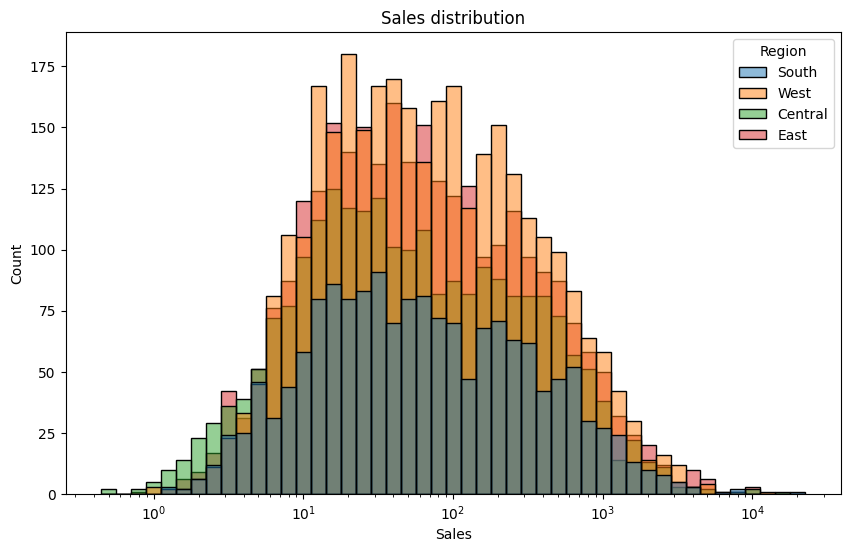

In [61]:
##Sales distribution
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x="Sales", hue="Region", log_scale=True)
plt.title("Sales distribution")
plt.savefig("images/Sales_distribution.png")

Our online store is the most popular in the East and in the West. They give us the most sales. We should work on growing our popularity in the South and in the Center


In [62]:
##Profit by category data
profit_by_category = round(df.groupby(by="Category")["Profit"].sum(),2)
profit_by_category

Category
Furniture           18451.27
Office Supplies    122490.80
Technology         145454.95
Name: Profit, dtype: float64

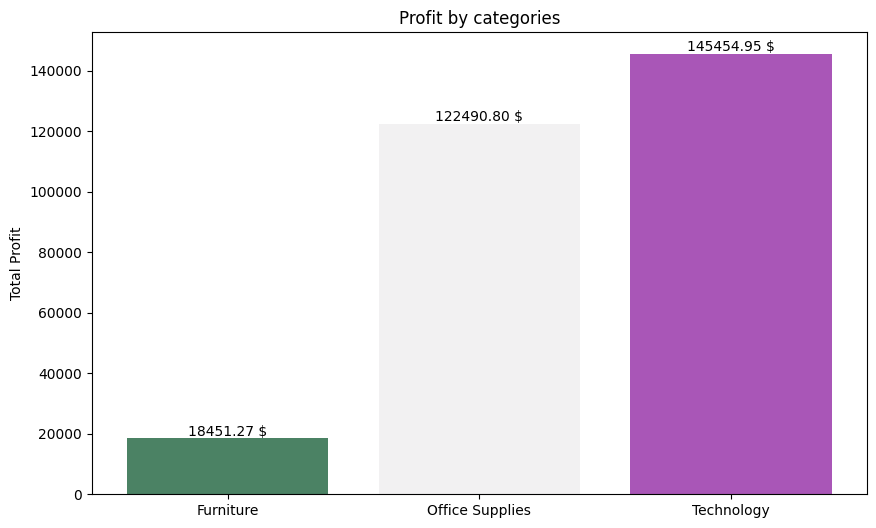

In [63]:
##Profit by categories plot
fig, ax = plt.subplots(figsize = (10,6))
bar_container = ax.bar(profit_by_category.index, profit_by_category.values, color = colors)
ax.bar_label(bar_container, fmt=lambda x: f'{x :.2f} $')
ax.set(ylabel="Total Profit", title="Profit by categories")
plt.savefig("images/Profit_by_category_bar.png")
plt.show()

Selling technologies gives us the most money. We should concentrate on it and develop it. Furniture is 9 times less profitable. We should either improve it or just remove it. 

In [64]:
##Preparing data 2
pivot_table = df.pivot_table(index='City', values='Profit', aggfunc=lambda x: round(x.sum(), 2))
pivot_table = pivot_table.reindex(pivot_table.sort_values(by="Profit", ascending=True).index)[:5]
pivot_table

,Profit
City,
Philadelphia,-13837.77
Houston,-10153.55
San Antonio,-7299.05
Lancaster,-7239.07
Chicago,-6654.57


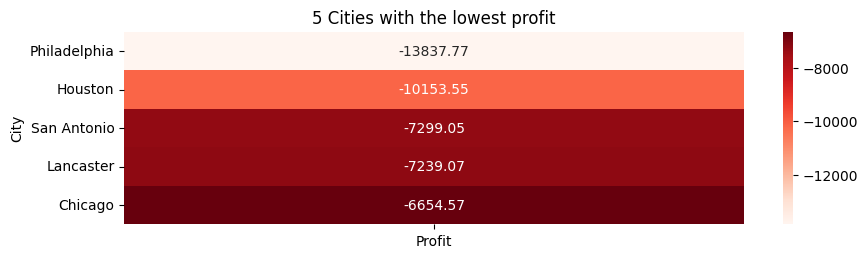

In [65]:
#Cities with negative profit
plt.figure(figsize=(10, len(pivot_table) * 0.5))
sns.heatmap(pivot_table, annot=True, fmt=".2f", cmap="Reds", cbar=True)
plt.title("5 Cities with the lowest profit")
plt.savefig("images/The_lowest_profit_cities.png")

Philadelphia, Houston, San Antonio, Lancaster and Chicago have the most negative profit. The negative profit here is more than -6000. Selling here isn't beneficial

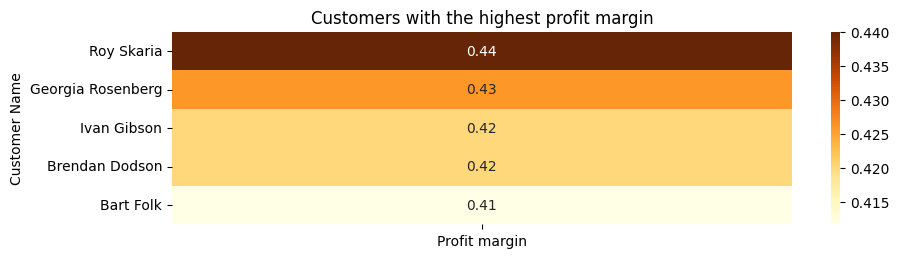

In [66]:
##Customer with different margins
pivot_client = df.pivot_table(index="Customer Name", values="Profit margin",aggfunc= "mean")
pivot_client = pivot_client.reindex(pivot_client.sort_values(by="Profit margin", ascending=False).index)[:5]
plt.figure(figsize=(10, len(pivot_client) * 0.5))
sns.heatmap(pivot_client, annot=True, fmt=".2f", cmap="YlOrBr", cbar=True)
plt.title("Customers with the highest profit margin")
plt.savefig("images/The_lowest_profit_margin_clients.png")

We have 5 clients with whom have profit margin more than 0.4. We should work on strengthening relationships with them. We recieve more than 40% of the cost as profit from each deal with them.